In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')


In [49]:
conn = sqlite3.connect('inventory.db')
df = pd.read_sql_query("""SELECT * FROM vendor_sales_summary""",conn)

In [51]:
df.head()

,VendorNumber,VendorName,Brand,ACTUALPrice,Volume,PurchasePrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,36.99,1750.0,26.27,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,0.252977,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,28.99,1750.0,23.19,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,0.210628,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,24.99,1750.0,18.24,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,0.246758,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,22.99,1750.0,16.17,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,0.271399,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,29.99,1750.0,21.89,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,0.284128,0.983556,1.396897


EDA

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
ACTUALPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05


In [56]:
df.ProfitMargin.isna().sum()

0

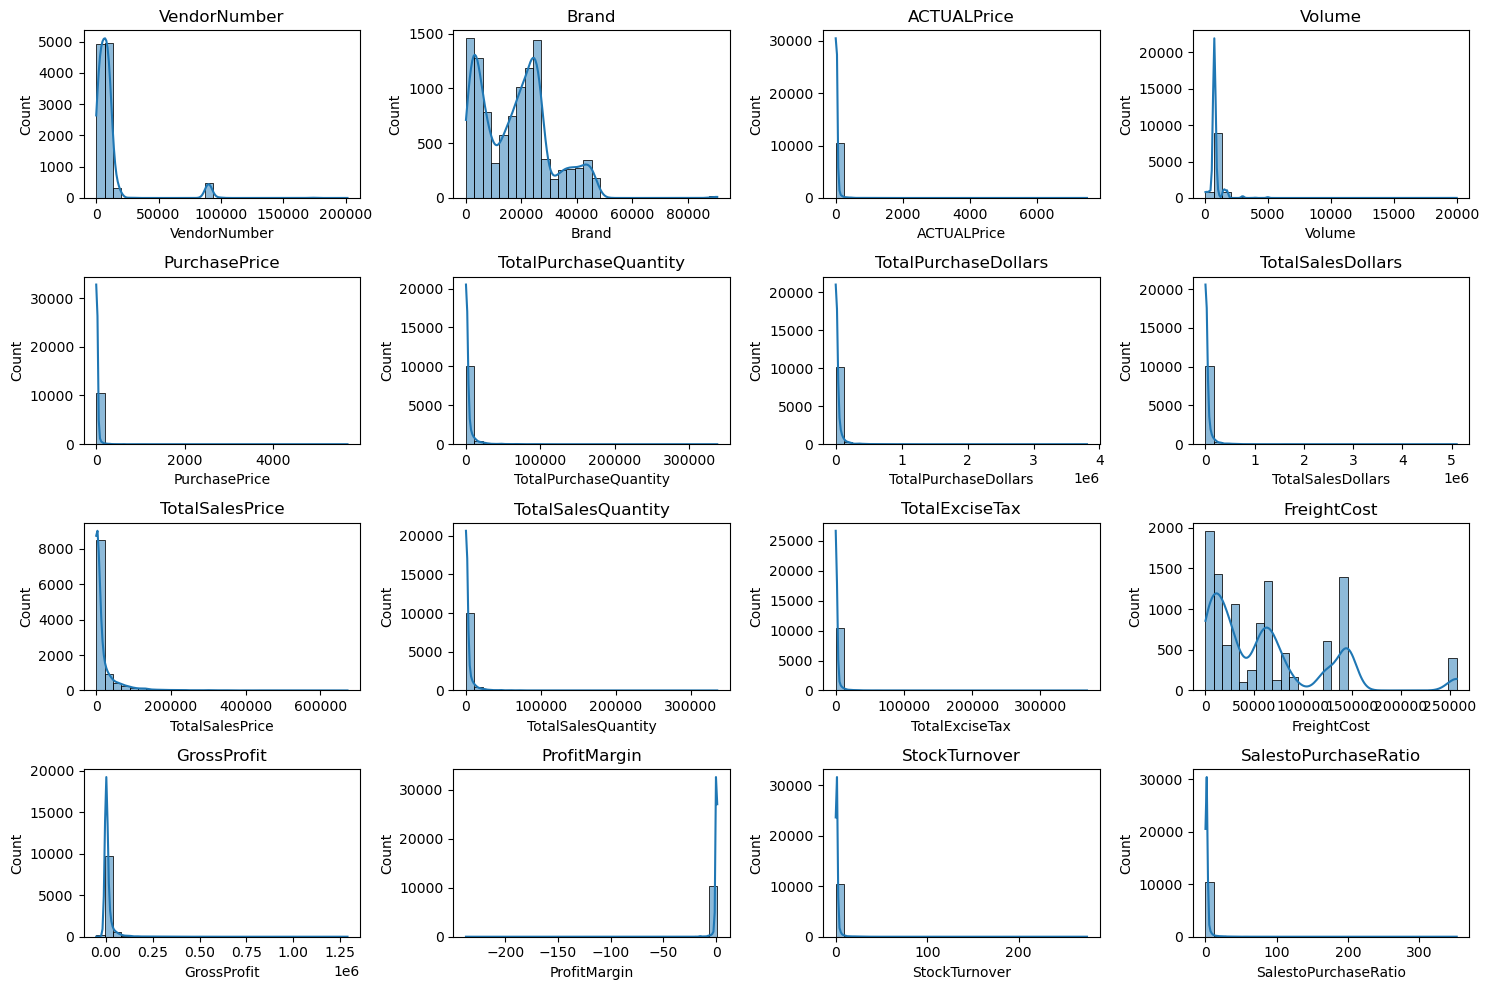

In [58]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for idx, col in enumerate(numerical_cols):
    plt.subplot(4, 4, idx + 1)  # 4x4 grid; adjust as needed
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

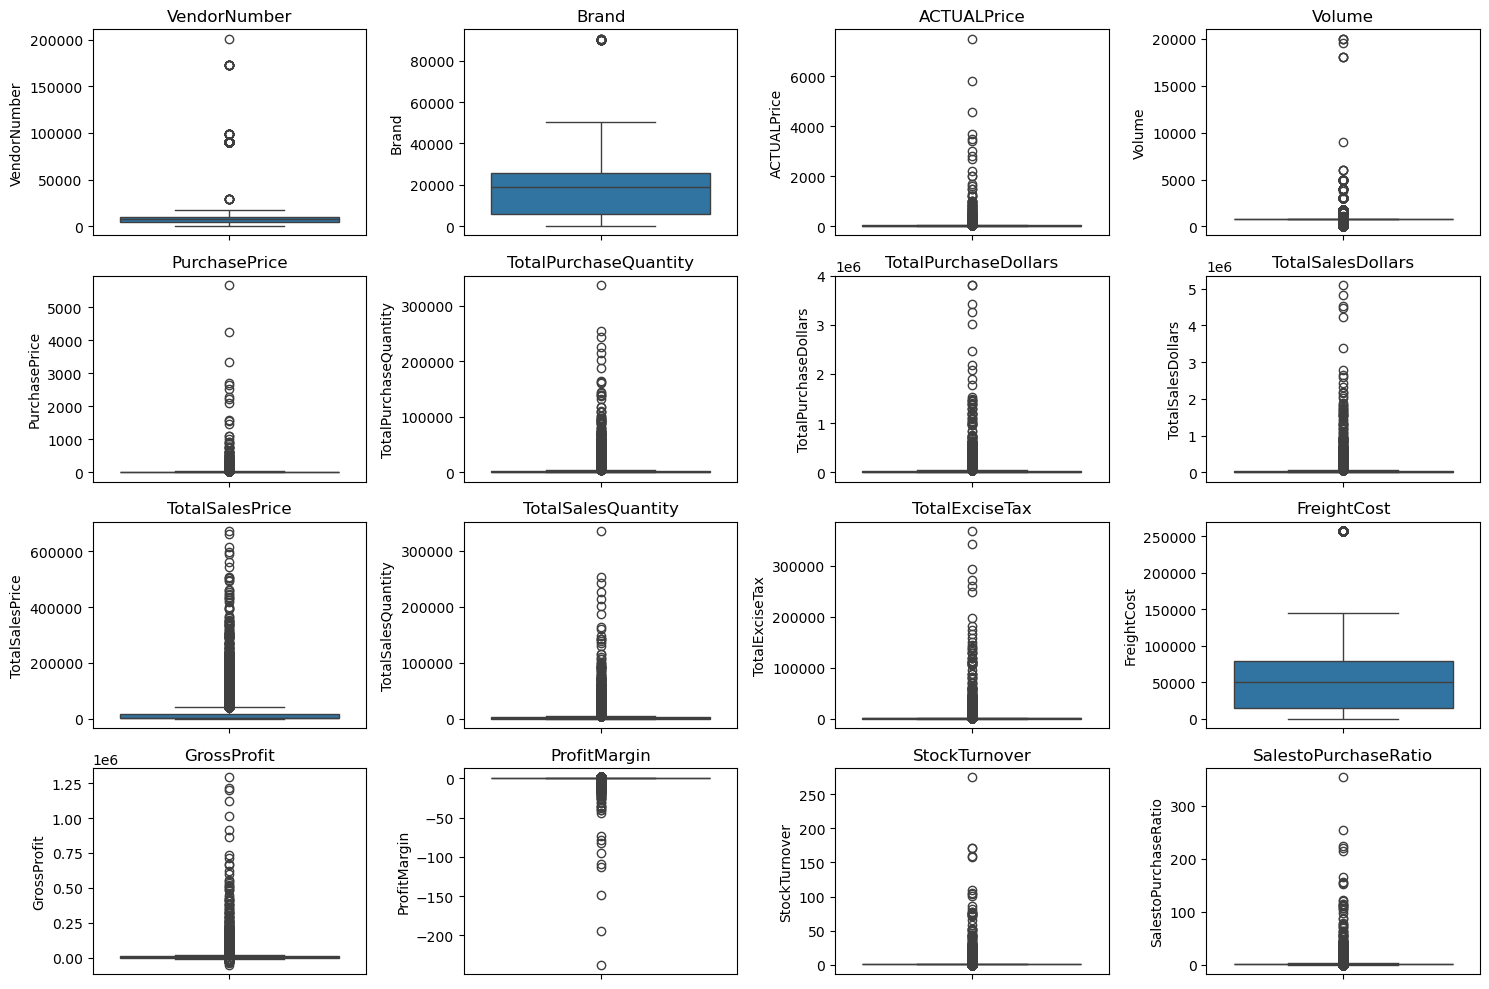

In [59]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for idx, col in enumerate(numerical_cols):
    plt.subplot(4, 4, idx + 1)  # 4x4 grid; adjust as needed
    sns.boxplot(y = df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**Negative & Zero Values:**

Gross Profit: The minimum value is -52,002.78, indicating losses. This may occur when products are sold at a loss, either due to high costs or discounts that bring the selling price below the purchase price.
Profit Margin: The minimum is negative infinity, which occurs when revenue is zero or less than the costs.
Total Sales Quantity & Sales Dollars: Both have minimum values of zero, showing that some products were purchased but never sold—potentially indicating obsolete or slow-moving inventory.

**Outliers with High Standard Deviations:**

Purchase & Actual Prices: The highest values (5,681.81 and 4,999.99) are far above the means (24.39 and 35.64), suggesting the presence of high-priced premium items.
Freight Cost: There is a large range, from 0.09 up to 257,032.07, which may point to inefficiencies in logistics or bulk shipping events.
Stock Turnover: Values range from 0 to 27.45. Some products turn over very quickly, while others remain in stock for long periods. A value above 1 means sales are being fulfilled from older stock, with sold quantities exceeding recent purchase quantities.


In [63]:
df = pd.read_sql(""" SELECT *
FROM vendor_sales_summary
where GrossProfit>0 AND ProfitMargin >0 And TotalSalesQuantity >0""",conn)

In [65]:
df.shape

(8564, 17)

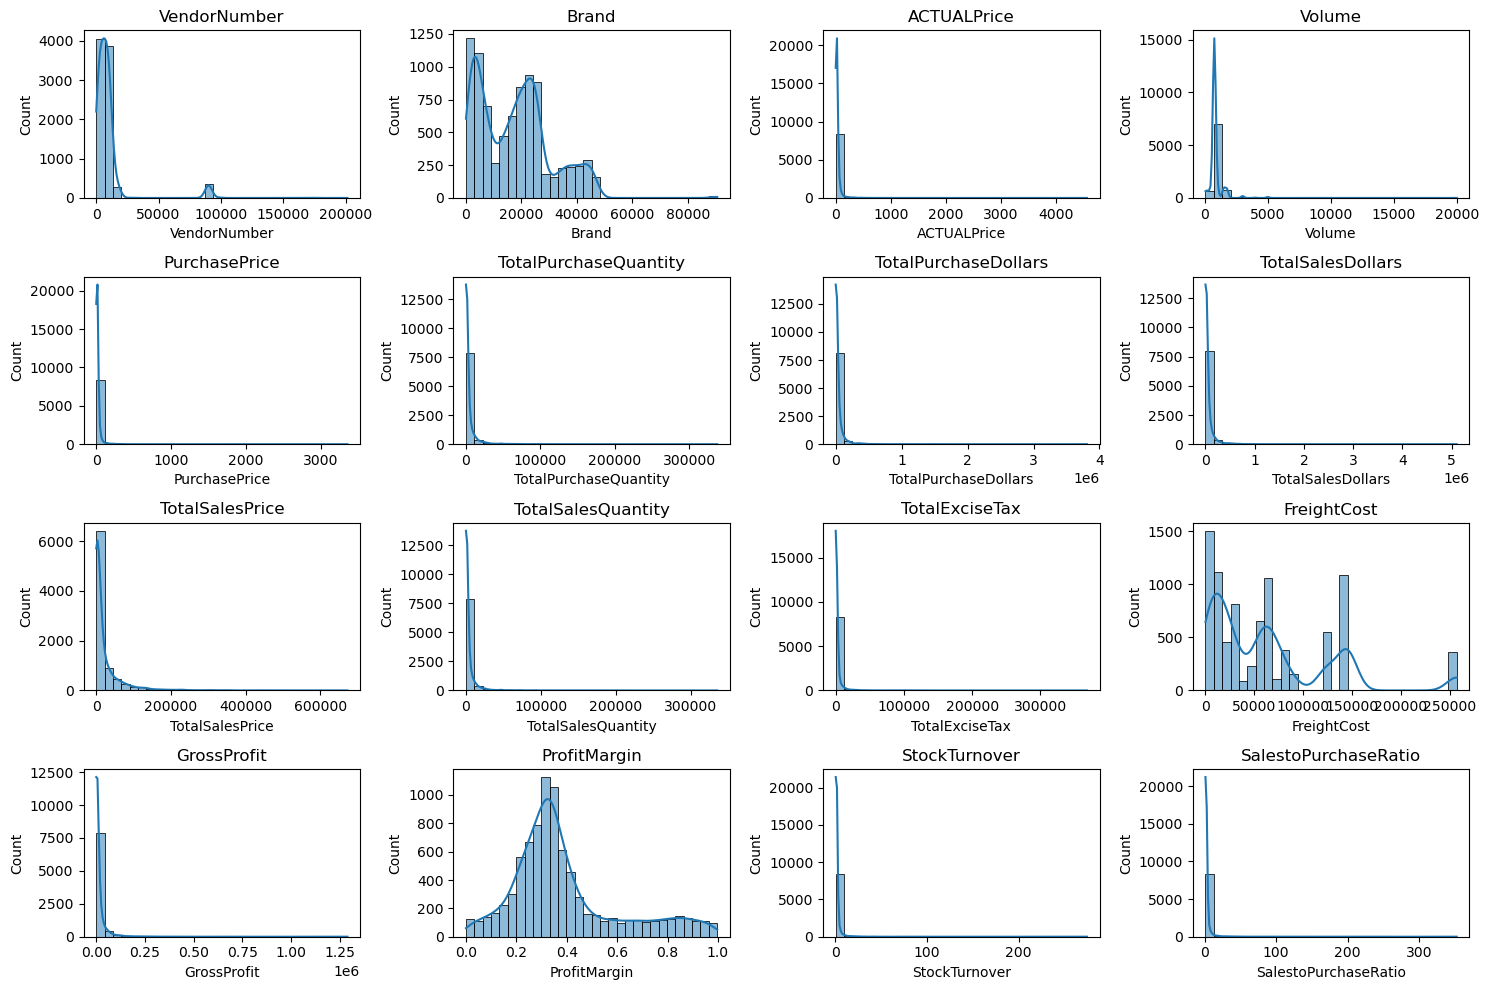

In [67]:
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for idx, col in enumerate(numerical_cols):
    plt.subplot(4, 4, idx + 1)  # 4x4 grid; adjust as needed
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

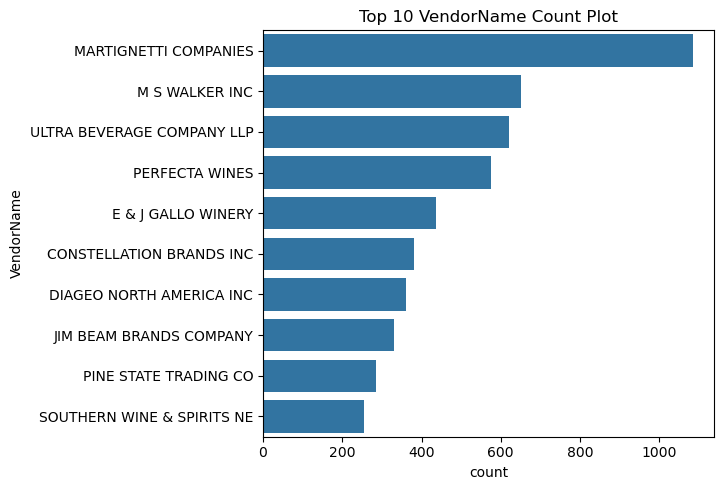

In [68]:
# Count plots for categorical columns
categorical_cols = ["VendorName"]

plt.figure(figsize=(12, 5))
for idx, col in enumerate(categorical_cols):
    plt.subplot(1, 2, idx + 1)
    top_categories = df[col].value_counts().index[:10]
    sns.countplot(y=col, data=df, order=top_categories)
    plt.title(f"Top 10 {col} Count Plot")
plt.tight_layout()
plt.show()

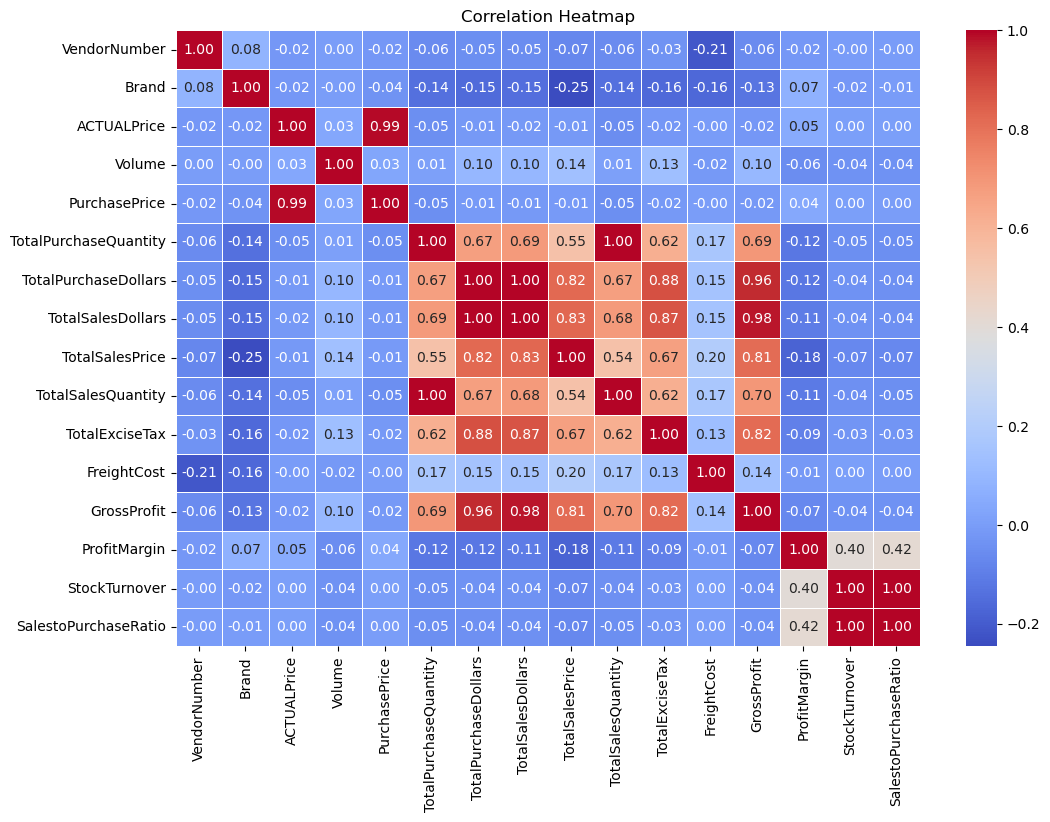

In [69]:
plt.figure(figsize=(12, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**DATA ANALYSIS**

Identify brand that needs promotional or pricing adjustment which exhibit lower sales performance but higher profit margin

In [75]:
df1 = df.groupby(['Brand'])[['TotalSalesDollars','TotalSalesPrice','ProfitMargin']].sum().reset_index()

In [77]:
df1.head()

,Brand,TotalSalesDollars,TotalSalesPrice,ProfitMargin
0,58,43341.54,28145.64,0.239898
1,60,18716.25,10720.79,0.354347
2,61,4364.88,363.74,0.242316
3,62,119863.75,90154.51,0.234598
4,63,112249.22,88553.10,0.225266


In [79]:
low_sales = df1['TotalSalesDollars'].quantile(0.15)
high_sales = df1['ProfitMargin'].quantile(0.85)

In [81]:
low_sales,high_sales

(563.53, 0.6360567026768063)

In [83]:
target_brands = df1[(df1['TotalSalesDollars']<low_sales) & (df1['ProfitMargin']>high_sales)]
target_brands

,Brand,TotalSalesDollars,TotalSalesPrice,ProfitMargin
7,75,314.79,134.91,0.652467
25,122,252.77,230.79,0.968509
29,129,284.91,252.92,0.649152
30,140,527.52,373.66,0.642857
79,267,77.94,25.98,0.733385
...,...,...,...,...
8379,45495,508.68,364.77,0.836754
8420,45993,142.87,98.91,0.818296
8439,46135,94.81,59.88,0.965404
8458,46327,342.51,216.69,0.774664


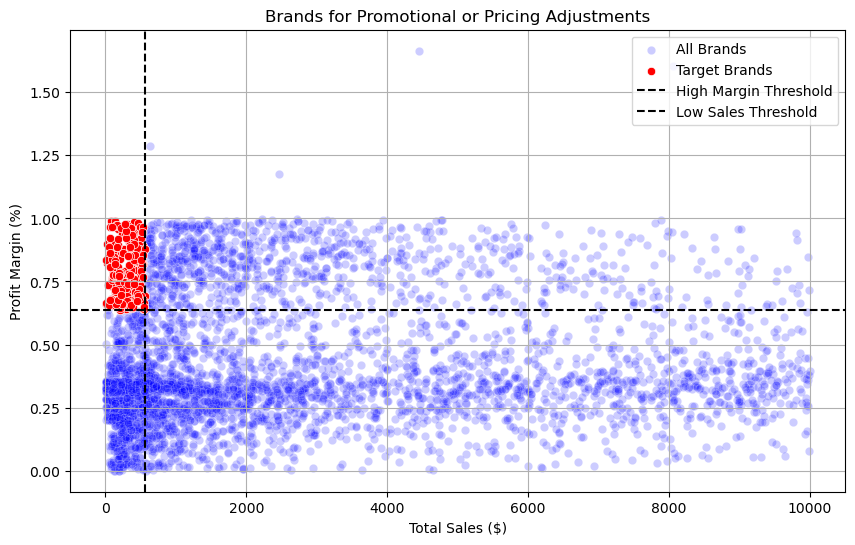

In [85]:
df1 =df1[df1['TotalSalesDollars']<10000]
plt.figure(figsize=(10, 6))

# Plot all brands
sns.scatterplot(
    data=df1,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color='blue',
    label='All Brands',
    alpha=0.2
)

# Highlight target brands
sns.scatterplot(
    data=target_brands,
    x='TotalSalesDollars',
    y='ProfitMargin',
    color='red',
    label='Target Brands'
)

# Add threshold lines
plt.axhline(high_sales, linestyle='--', color='black', label='High Margin Threshold')
plt.axvline(low_sales, linestyle='--', color='black', label='Low Sales Threshold')

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()


Which vendors and brand demostrate the highest sales performance?

In [88]:
df2 =df.groupby(['VendorName'])[['TotalSalesDollars']].sum()

In [90]:
top10_vendor = df2.sort_values('TotalSalesDollars', ascending = False).head(10)

In [92]:
df3 =df.groupby(['Brand'])[['TotalSalesDollars']].sum()

In [94]:
top10_brand = df3.sort_values('TotalSalesDollars', ascending = False).head(10)

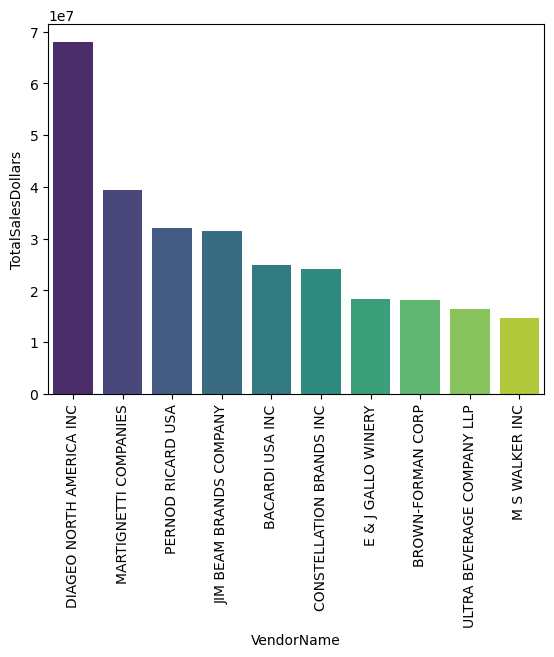

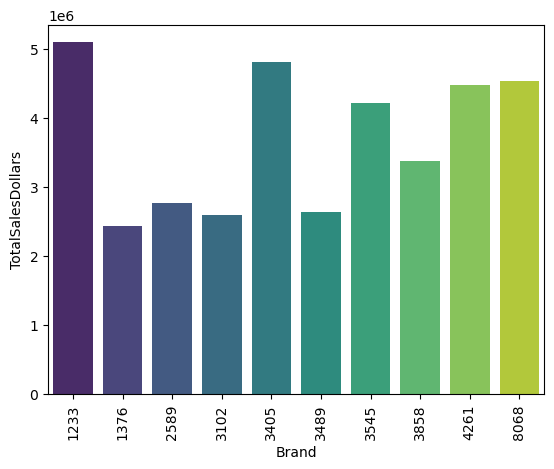

In [96]:
sns.barplot(data =top10_vendor, x = 'VendorName', y = 'TotalSalesDollars', palette='viridis')
plt.xticks(rotation=90) 
plt.show()
sns.barplot(data = top10_brand, x = 'Brand', y = 'TotalSalesDollars', palette='viridis')
plt.xticks(rotation=90) 
plt.show()

which vendor contributr the most to t0tal purchase dollars?

In [98]:
df4 = df.groupby(['VendorName'])[['TotalPurchaseDollars','GrossProfit','TotalSalesDollars']].sum()

In [101]:
top10_ven_pur = df4.sort_values('TotalPurchaseDollars', ascending = False).head(10)


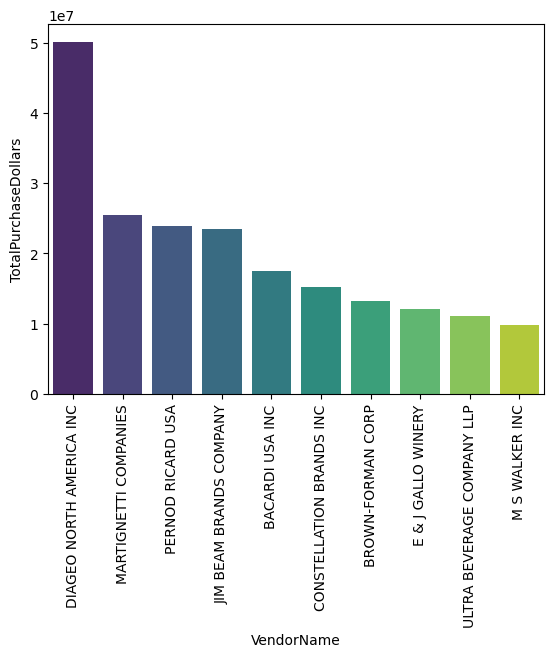

In [103]:
sns.barplot(data = top10_ven_pur, x = 'VendorName', y = 'TotalPurchaseDollars', palette='viridis')
plt.xticks(rotation=90) 
plt.show()

In [110]:
df4['percentage_contribution'] = (df4['TotalPurchaseDollars'] * 100)/total_purchase

In [108]:
total_purchase = df4['TotalPurchaseDollars'].sum()

In [112]:
df4.head()

,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,percentage_contribution
VendorName,,,,
ADAMBA IMPORTS INTL INC,446.16,258.37,704.53,0.000145
ALISA CARR BEVERAGES,25698.12,78772.82,104470.94,0.008362
ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81,0.003809
AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16,0.000304
AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53,0.033981


In [114]:
top = df4.sort_values('percentage_contribution', ascending = False).head(10)

How much of total procurement is dependent on the top vendors?

In [117]:
print(f"Percentage contribution of top 10 vendor is : {top['percentage_contribution'].sum()}")

Percentage contribution of top 10 vendor is : 65.68960039360742


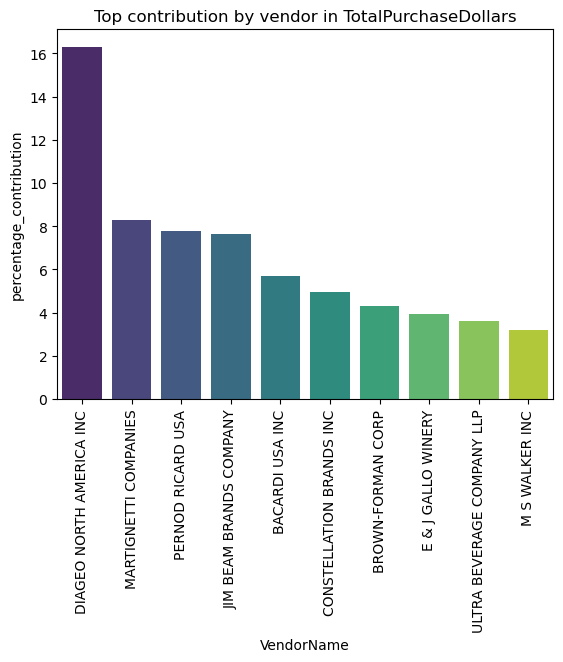

In [119]:
sns.barplot(data = top, x = 'VendorName', y = 'percentage_contribution', palette='viridis')
plt.xticks(rotation=90) 
plt.title('Top contribution by vendor in TotalPurchaseDollars')
plt.show()

Does purchasing in bulk reduce the unit price, and what is the optimal purchace volume for cost savings?

In [122]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [124]:
df.head()

,VendorNumber,VendorName,Brand,ACTUALPrice,Volume,PurchasePrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,36.99,1750.0,26.27,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,0.252977,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,28.99,1750.0,23.19,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,0.210628,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,24.99,1750.0,18.24,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,0.246758,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,22.99,1750.0,16.17,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,0.271399,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,29.99,1750.0,21.89,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,0.284128,0.983556,1.396897,21.89


In [126]:
df['QuantityCategory'] = pd.qcut(df['TotalSalesQuantity'],q=3,labels=['small', 'medium', 'large'])


In [128]:
df['QuantityCategory'].unique()

['large', 'medium', 'small']
Categories (3, object): ['small' < 'medium' < 'large']

In [130]:
df.groupby('QuantityCategory')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
QuantityCategory,
small,39.307160
medium,15.293360
large,10.729888


<Axes: xlabel='QuantityCategory', ylabel='UnitPurchasePrice'>

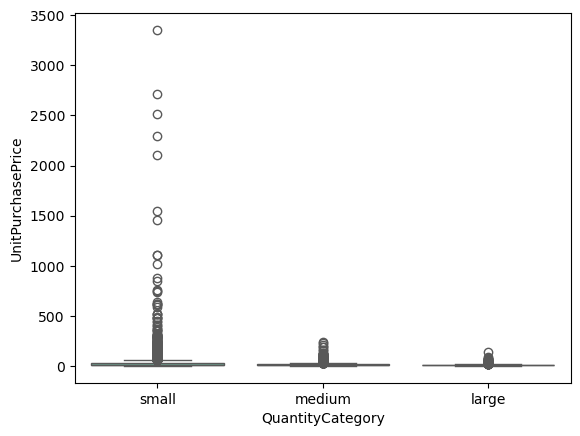

In [132]:
sns.boxplot(data = df , x = 'QuantityCategory', y = 'UnitPurchasePrice' , palette="Set2")

Vendors who purchase in bulk (Large Order Size) secure the lowest unit price ($10.78 per unit), allowing for higher profit margins if they handle inventory efficiently.

The unit cost difference between Small and Large orders is significant, with bulk orders offering approximately a 72% reduction in unit price.

This indicates that bulk pricing strategies effectively motivate vendors to buy in larger quantities, resulting in increased total sales even though the revenue per unit is lower.

Which vendors have low inventory turnover, indicating excess stock and slow-moving products?

In [136]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending = True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it ?

In [139]:
df['unsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']

In [141]:
print('Total unsold capital :',abs(df['unsoldInventoryValue'].sum()))

Total unsold capital : 2708177.2199999997


In [143]:
df.groupby('VendorName')[['unsoldInventoryValue']].sum().sort_values('unsoldInventoryValue', ascending = False).head(10)

,unsoldInventoryValue
VendorName,
DIAGEO NORTH AMERICA INC,722209.05
JIM BEAM BRANDS COMPANY,554665.63
PERNOD RICARD USA,470625.61
WILLIAM GRANT & SONS INC,401960.83
E & J GALLO WINERY,228282.61
SAZERAC CO INC,198436.41
BROWN-FORMAN CORP,177733.74
CONSTELLATION BRANDS INC,133617.62
MOET HENNESSY USA INC,126477.70


What is 95% confidence interval for profit margins of top_performing and low performing vendors

In [100]:
mean_p = df['ProfitMargin'].mean()
std_p = df['ProfitMargin'].std()

In [102]:
lowest_interval = mean_p - 2*std_p
highest_interval = mean_p + 2*std_p

In [104]:
df[(df['ProfitMargin'] > lowest_interval) & (df['ProfitMargin'] < highest_interval)]

,VendorNumber,VendorName,Brand,ACTUALPrice,Volume,PurchasePrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,QuantityCategory,unsoldInventoryValue
0,1128,BROWN-FORMAN CORP,1233,36.99,1750.0,26.27,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,0.252977,0.979108,1.338647,26.27,large,79624.37
1,4425,MARTIGNETTI COMPANIES,3405,28.99,1750.0,23.19,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,0.210628,0.976890,1.266830,23.19,large,87913.29
2,17035,PERNOD RICARD USA,8068,24.99,1750.0,18.24,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,0.246758,0.998575,1.327594,18.24,large,4870.08
3,3960,DIAGEO NORTH AMERICA INC,4261,22.99,1750.0,16.17,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,0.271399,0.993703,1.372493,16.17,large,20535.90
4,3960,DIAGEO NORTH AMERICA INC,3545,29.99,1750.0,21.89,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,0.284128,0.983556,1.396897,21.89,large,49712.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8553,8673,STE MICHELLE WINE ESTATES,13344,5.29,1500.0,3.57,1,3.57,5.29,5.29,1.0,0.22,15919.70,1.72,0.325142,1.000000,1.481793,3.57,small,0.00
8554,4425,MARTIGNETTI COMPANIES,27934,4.99,750.0,3.37,1,3.37,4.99,4.99,1.0,0.11,144929.24,1.62,0.324649,1.000000,1.480712,3.37,small,0.00
8555,6785,PALM BAY INTERNATIONAL INC,22161,4.99,750.0,3.35,1,3.35,9.99,9.99,1.0,0.11,13605.41,6.64,0.664665,1.000000,2.982090,3.35,small,0.00
8557,3960,DIAGEO NORTH AMERICA INC,8729,0.99,50.0,0.74,4,2.96,5.94,2.97,6.0,0.31,257032.07,2.98,0.501684,1.500000,2.006757,0.74,small,-1.48


In [106]:
df[df['ProfitMargin'] > highest_interval]

,VendorNumber,VendorName,Brand,ACTUALPrice,Volume,PurchasePrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,QuantityCategory,unsoldInventoryValue
3681,2555,DISARONNO INTERNATIONAL LLC,1212,21.99,750.0,14.38,563,8095.94,56941.89,29106.65,2611.0,2056.75,5861.03,48845.95,0.857821,4.637655,7.033388,14.38,large,-29450.24
4226,10754,PERFECTA WINES,10264,29.99,750.0,19.60,267,5233.20,37307.56,16794.40,1244.0,138.57,28720.52,32074.36,0.859728,4.659176,7.129015,19.60,medium,-19149.20
4488,653,STATE WINE & SPIRITS,23256,13.99,750.0,9.39,442,4150.38,25727.61,9751.03,1839.0,205.35,8014.98,21577.23,0.838680,4.160633,6.198856,9.39,large,-13117.83
4550,1128,BROWN-FORMAN CORP,1722,449.99,1000.0,351.55,11,3867.05,21599.52,19349.57,48.0,50.40,68601.68,17732.47,0.820966,4.363636,5.585529,351.55,small,-13007.35
4694,4425,MARTIGNETTI COMPANIES,46485,54.99,750.0,35.94,95,3414.30,18924.62,10750.08,338.0,37.47,144929.24,15510.32,0.819584,3.557895,5.542753,35.94,medium,-8733.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8558,3960,DIAGEO NORTH AMERICA INC,2626,1.99,50.0,1.42,2,2.84,27.86,5.97,14.0,0.73,257032.07,25.02,0.898062,7.000000,9.809859,1.42,small,-17.04
8559,9815,WINE GROUP INC,8527,4.99,750.0,1.32,2,2.64,15.95,10.96,5.0,0.55,27100.41,13.31,0.834483,2.500000,6.041667,1.32,small,-3.96
8560,8004,SAZERAC CO INC,5683,0.49,50.0,0.39,6,2.34,65.66,1.47,134.0,7.04,50293.62,63.32,0.964362,22.333333,28.059829,0.39,medium,-49.92
8562,3960,DIAGEO NORTH AMERICA INC,6127,1.99,200.0,1.47,1,1.47,143.28,77.61,72.0,15.12,257032.07,141.81,0.989740,72.000000,97.469388,1.47,small,-104.37


In [108]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [110]:
top_vendor = df[df['TotalSalesDollars'] >= top_threshold]
low_vendors = df[df['TotalSalesDollars'] <= low_threshold]

In [112]:
top_vendor['ProfitMargin'].max()

0.9501253009680114

In [114]:
low_vendors['ProfitMargin'].max()

0.9939366366117959

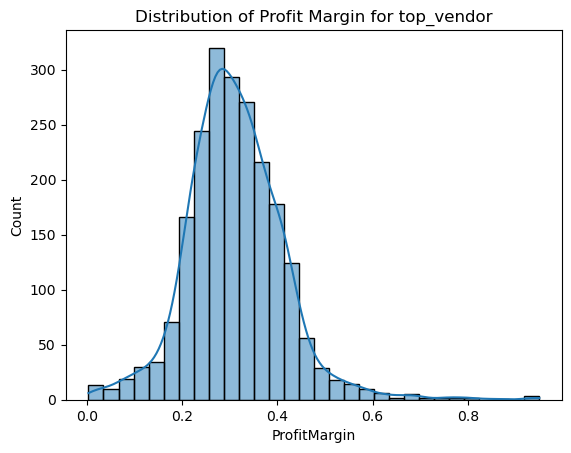

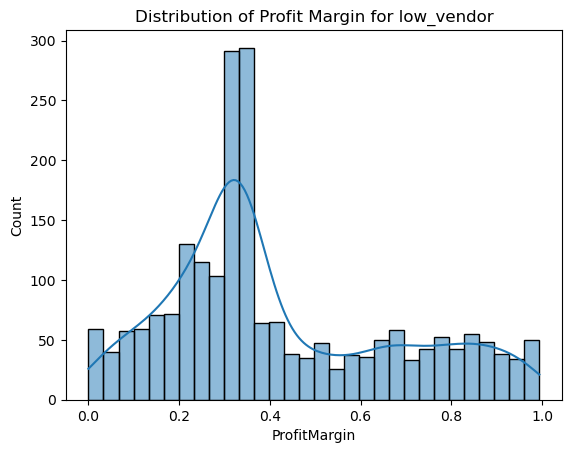

In [116]:
sns.histplot(data=top_vendor, x='ProfitMargin', bins=30, kde=True)
plt.title('Distribution of Profit Margin for top_vendor')
plt.show()
sns.histplot(data=low_vendors, x='ProfitMargin', bins=30, kde=True)
plt.title('Distribution of Profit Margin for low_vendor')
plt.show()

In [117]:
# 95% confidence interval for low_vendors
mean_p = top_vendor['ProfitMargin'].mean()
std_p = top_vendor['ProfitMargin'].std()
low = mean_p - 2*std_p
high = mean_p + 2*std_p
high,low

(0.5174535126705652, 0.10610473599088124)

In [120]:
#66% confidence interval for low_vendors
mean_pr = low_vendors['ProfitMargin'].mean()
std_pr = low_vendors['ProfitMargin'].std()
low_pr = mean_pr - 1*std_pr
high_pr = mean_pr + 1*std_pr
high_pr,low_pr

(0.6676257864874925, 0.1637576097720359)

In [122]:
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std_error = np.std(data, ddof=1) / np.sqrt(len(data))
    t_value = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    error_margin = t_value * std_error
    lower_bound = mean - error_margin
    upper_bound = mean + error_margin
    return mean, lower_bound, upper_bound

top_mean, top_lower, top_upper = confidence_interval(top_vendor['ProfitMargin'])
low_mean, low_lower, low_upper = confidence_interval(low_vendors['ProfitMargin'])

In [124]:
top_mean, top_lower, top_upper

(0.3117791243307232, 0.3074206381203126, 0.31613761054113376)

In [126]:
low_mean, low_lower, low_upper

(0.4156916981297642, 0.40501412899825734, 0.42636926726127106)

Top Vendors 95% CI: (0.31, 0.32), Mean: 0.31
Low Vendors 95% CI: (0.41, 0.43), Mean: 0.42


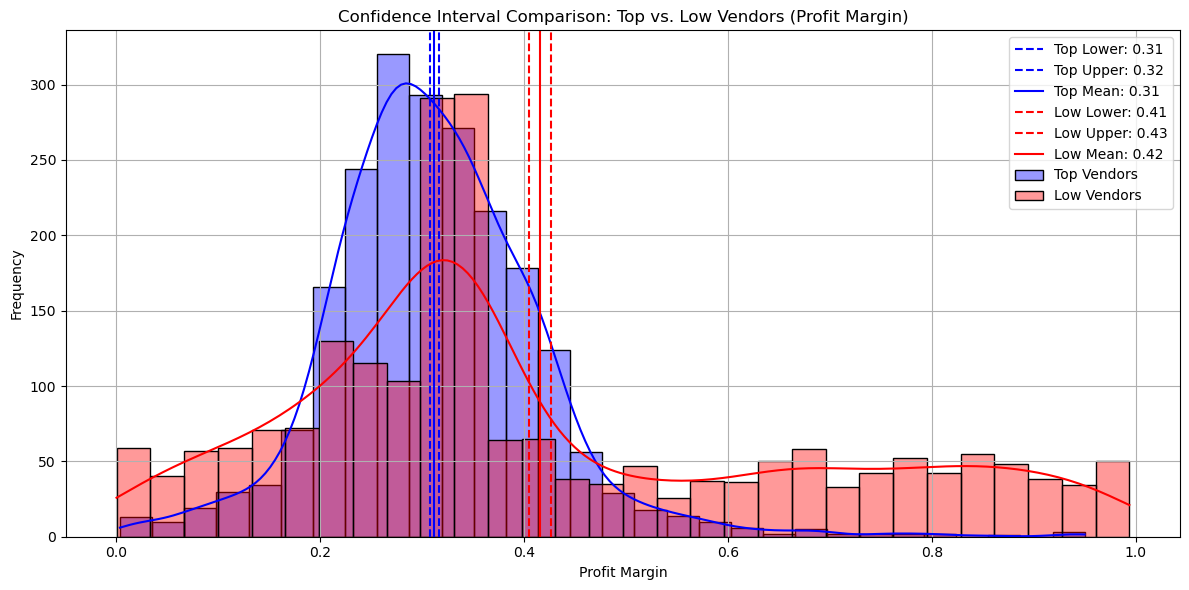

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Print confidence intervals
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

# Create the plot
plt.figure(figsize=(12, 6))

# Plot histogram for Top Vendors (Profit Margin)
sns.histplot(
    data=top_vendor['ProfitMargin'],
    kde=True,
    color="blue",
    bins=30,
    alpha=0.4,
    label="Top Vendors"
)
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Plot histogram for Low Vendors (Profit Margin)
sns.histplot(
    data=low_vendors['ProfitMargin'],
    kde=True,
    color="red",
    bins=30,
    alpha=0.4,
    label="Low Vendors"
)
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize the plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The confidence interval for low-performing vendors (40.48% to 42.62%) is notably higher than that of top-performing vendors (30.74% to 31.61%).

This indicates that vendors with lower sales volumes often achieve higher profit margins, possibly due to premium pricing or reduced operational expenses.

High-performing vendors seeking greater profitability might consider strategies such as targeted price adjustments, cost reductions, or bundling their offerings.

For low-performing vendors, the presence of higher margins alongside low sales may signal the need for improved marketing, more competitive pricing, or enhanced distribution methods

In [54]:
df['TotalSalesPrice'].sum()

194910394.55

In [58]:
df['TotalSalesDollars'].sum()

441408069.45

In [133]:
df['unsoldInventoryValue'].sum()

2708177.2199999997

In [139]:
df['ProfitMargin'].mean()

0.3872298710928555